In [36]:
import statistics


def avg_med_var(input_list):
    mean = statistics.mean(input_list)
    median = statistics.median(input_list)
    variance = statistics.pvariance(input_list)
    return mean, median, variance


print(avg_med_var([1,4,3,2,5,6,8,7,9,10]))
print(avg_med_var([1,4,3,2,5,6,8,7,9,10, 11]))
    

(5.5, 5.5, 8.25)
(6, 6, 10)


In [37]:
input_list = [1,4,3,2,5,6,8,7,9,10]
sum = 0
for v in input_list:
    sum += (v - 5.5) ** 2
print(sum)

82.5


In [38]:
import pandas as pd
score = pd.read_csv('user_score.csv')
score.head(5)

,Unnamed: 0,user,kokugo,shakai,sugaku,rika
0,0,0,24,24,3,93
1,1,1,42,17,65,8
2,2,2,39,65,45,83
3,3,3,99,35,79,11
4,4,4,37,55,36,20


In [39]:
score.describe()

,Unnamed: 0,user,kokugo,shakai,sugaku,rika
count,167.00000,167.00000,167.000000,167.000000,167.000000,167.000000
mean,83.00000,83.00000,46.437126,49.425150,50.149701,48.814371
std,48.35287,48.35287,29.310458,29.163314,27.935517,30.091351
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,41.50000,41.50000,21.500000,25.000000,30.500000,23.000000
50%,83.00000,83.00000,44.000000,50.000000,48.000000,46.000000
75%,124.50000,124.50000,70.500000,74.500000,74.500000,78.000000
max,166.00000,166.00000,99.000000,99.000000,99.000000,99.000000


In [40]:
# kokugo = score['kokugo'].tolist()
kokugo = score.iloc[:, 2].tolist()
mean_kokugo = statistics.mean(kokugo)
mean_kokugo

46.43712574850299

In [41]:
def above_mean(df):
    user_count = 0
    mean_kokugo = statistics.mean(score.iloc[:, 2].tolist())
    mean_shakai = statistics.mean(score.iloc[:, 3].tolist())
    mean_sugaku = statistics.mean(score.iloc[:, 4].tolist())
    mean_rika = statistics.mean(score.iloc[:, 5].tolist())
    condition_kokugo = df['kokugo'] > mean_kokugo
    condition_shakai = df['shakai'] > mean_shakai
    condition_sugaku = df['sugaku'] > mean_sugaku
    condition_rika = df['rika'] > mean_rika
    df_condition = df[condition_kokugo & condition_shakai & condition_sugaku & condition_rika]
    df_condition.columns = [' ', 'user', 'kokugo', 'shakai', 'sugaku', 'rika']
    return df_condition


above_mean(score)


,,user,kokugo,shakai,sugaku,rika
11,11,11,92,58,58,49
14,14,14,53,62,76,89
18,18,18,75,79,87,68
50,50,50,59,83,97,56
54,54,54,86,80,79,77
76,76,76,89,80,82,70
114,114,114,73,98,59,86
116,116,116,96,97,73,62
119,119,119,97,96,62,92
128,128,128,64,86,94,78


In [70]:
def score_sum(df):
    each_sum = score[['kokugo', 'shakai', 'sugaku', 'rika']].sum(axis=1)
    return each_sum


user_score = score_sum(score)
user_score = user_score.sort_values(ascending=False)
user_score.head(5)
# user_score.plot.hist()


119    347
116    328
141    327
54     322
128    322
dtype: int64

In [55]:
def score_top3(df):
    user_score = score_sum(score)
    user_score = user_score.sort_values(ascending=False)
    top3_list = user_score.tolist()[:3]
    return top3_list


score_top3(score)


[347, 328, 327]

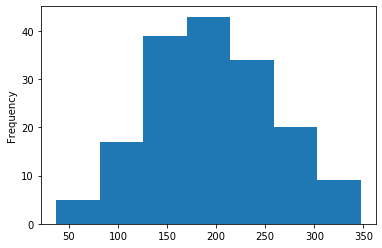

In [60]:
def score_hist(df):
    user_score = score_sum(score)
    user_score.plot.hist(bins=7)


score_hist(score)


In [61]:
user_class = pd.read_csv('user_class.csv')
user_class.head(5)

,Unnamed: 0,user,class
0,0,0,C
1,1,1,B
2,2,2,B
3,3,3,A
4,4,4,B


In [79]:
def score_by_class(df1, df2):
    df = pd.merge(df1, df2, how='outer', on='user')
    df['sum'] = df[['kokugo', 'shakai', 'sugaku', 'rika']].sum(axis=1)
    result = df.groupby('class').agg({'sum':'max'})
    return result

score_by_class(score, user_class).to_dict()

{'sum': {'A': 327, 'B': 328, 'C': 347}}